In [1]:
import pandas as pd

In [2]:
# import the dataset ready for analysis
data = pd.read_csv("encoded_dataset.csv")
data

,model_name,load_duration,prompt_token_length,prompt,energy_consumption_llm_total,word_count,sentence_count,unique_word_count,punctuation_count,char_count,device_running
0,0,5.620996e+09,50.0,Write a Ruby code to convert a double-linked l...,0.000952,22.0,1.0,18.0,4.0,108.0,0
1,0,8.368040e+05,55.0,Write a code snippet using Python to pop an el...,0.000095,34.0,1.0,28.0,12.0,135.0,0
2,0,7.587510e+05,35.0,Create a Python application for running a text...,0.000219,26.0,2.0,21.0,3.0,135.0,0
3,0,7.467820e+05,97.0,"Execution result: \n Cell In[2]\, line 12\n ...",0.000114,70.0,3.0,47.0,59.0,242.0,0
4,0,8.012330e+05,34.0,The game could be more efficient by using a di...,0.000152,27.0,2.0,25.0,5.0,132.0,0
...,...,...,...,...,...,...,...,...,...,...,...
78420,4,7.434040e+05,34.0,"Given a text, use the given word to replace an...",0.000017,29.0,3.0,22.0,5.0,114.0,0
78421,4,2.173067e+06,26.0,"Given the following sentence,suggest an approp...",0.000045,21.0,2.0,19.0,4.0,97.0,0
78422,4,3.395910e+05,28.0,"Given a user query, detect the intent and resp...",0.000039,24.0,2.0,23.0,4.0,93.0,0
78423,4,7.564790e+05,47.0,"Given a song lyrics, generate a rhyming couple...",0.000020,37.0,2.0,29.0,8.0,116.0,0


In [3]:
data_prompt = data.drop("prompt", axis=1)

In [4]:
# X et y separation numpy
X = data_prompt.drop("energy_consumption_llm_total", axis=1).values
y = data_prompt["energy_consumption_llm_total"].values

In [5]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
data_prompt["energy_consumption_llm_total"].describe()
data_prompt["energy_consumption_llm_total"].var()


np.float64(5.963747111912486e-07)

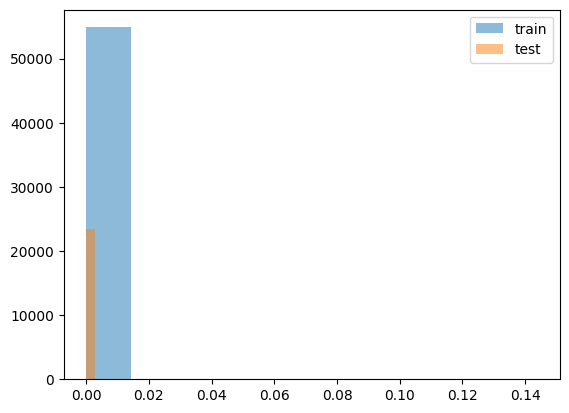

In [7]:
import matplotlib.pyplot as plt

plt.hist(y_train, alpha=0.5, label="train")
plt.hist(y_test, alpha=0.5, label="test")
plt.legend()
plt.show()


In [8]:
# use change_csv_delimiter function
#import ImportCleaner

input_folder_path = "data_ghadi/"
output_file_path = "data_ghadi_cleaned/"


files = ["alpaca_gemma_2b_laptop1.csv", 
        "alpaca_gemma_2b_laptop2.csv",
        "alpaca_gemma_2b_workstation.csv",
        "alpaca_gemma_7b_laptop2.csv",
        "alpaca_gemma_7b_workstation.csv",
        "alpaca_llama3_8b_laptop2.csv", 
        "alpaca_llama3_70b_server.csv",
        "codefeedback_codellama_7b_laptop1.csv",
        "codefeedback_codellama_7b_laptop2.csv",
        "codefeedback_codellama_7b_workstation.csv",
        "codefeedback_codellama_7b_workstation.csv",
        "codefeedback_gemma_2b_laptop2.csv",
        "codefeedback_gemma_2b_workstation.csv",
        "codefeedback_gemma_7b_laptop2.csv",
        "codefeedback_gemma_7b_workstation.csv"]

for file in files:
    print("Processing file: " + file)
    #change_csv_delimiter(input_file_path= input_folder_path + file, output_file_path= output_file_path + file)

Processing file: alpaca_gemma_2b_laptop1.csv
Processing file: alpaca_gemma_2b_laptop2.csv
Processing file: alpaca_gemma_2b_workstation.csv
Processing file: alpaca_gemma_7b_laptop2.csv
Processing file: alpaca_gemma_7b_workstation.csv
Processing file: alpaca_llama3_8b_laptop2.csv
Processing file: alpaca_llama3_70b_server.csv
Processing file: codefeedback_codellama_7b_laptop1.csv
Processing file: codefeedback_codellama_7b_laptop2.csv
Processing file: codefeedback_codellama_7b_workstation.csv
Processing file: codefeedback_codellama_7b_workstation.csv
Processing file: codefeedback_gemma_2b_laptop2.csv
Processing file: codefeedback_gemma_2b_workstation.csv
Processing file: codefeedback_gemma_7b_laptop2.csv
Processing file: codefeedback_gemma_7b_workstation.csv


In [9]:
# load and combine cleaned data


data_frames = []
for file in files:
    df = pd.read_csv("data_ghadi/" + file)
    hardware = file.replace(".csv", "").split("_")[-1]
    df["hardware"] = hardware
    data_frames.append(df)

combined_data = pd.concat(data_frames, ignore_index=True)
# drop columns "Unnamed: 0.2", "Unnamed: 0.1" and "Unnamed: 0"
combined_data = combined_data.drop(columns=["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0"])
# drop null values on the rows
combined_data = combined_data.dropna()
combined_data["model_name"] = combined_data["model_name"].replace("codellama", "codellama:7b")
combined_data["model_name"] = combined_data["model_name"].replace("llama3", "llama3:8b")
combined_data[["model_base", "model_size"]] = combined_data["model_name"].str.split(":", expand=True)
combined_data["model_size"] = combined_data["model_size"].str.replace("b", "", case=False).astype(float)
# change "hardware" from string to int (laptop1=1, laptop2=2, workstation=3, server=4)
combined_data["hardware"] = combined_data["hardware"].replace("laptop1", 1)
combined_data["hardware"] = combined_data["hardware"].replace("laptop2", 2)
combined_data["hardware"] = combined_data["hardware"].replace("workstation", 3)
combined_data["hardware"] = combined_data["hardware"].replace("server", 4)
# change "model_base" from string to int (gemma=1, codellama=2, llama3=3)
combined_data["model_base"] = combined_data["model_base"].replace("gemma", 1)
combined_data["model_base"] = combined_data["model_base"].replace("codellama", 2)
combined_data["model_base"] = combined_data["model_base"].replace("llama3", 3)
combined_data

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_24080\4157896938.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_data["hardware"] = combined_data["hardware"].replace("server", 4)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_24080\4157896938.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_data["model_base"] = combined_data["model_base"].replace("llama3", 3)


,index,model_name,created_at,total_duration,load_duration,prompt_token_length,prompt_duration,response_token_length,response_duration,prompt,...,length_x_complexity,questions_about_entities,desc_complexity_ratio,word_count_squared,avg_sentence_length_cubed,lexical_diversity,energy_consumption_llm_gpu,hardware,model_base,model_size
1,0,codellama:7b,2024-05-20 01:30:34.454555386+00:00,6.272181e+10,433357.0,39.0,1.437697e+10,119.0,4.833704e+10,Write a code snippet using Python to pop an el...,...,0.000000,0.0,0.029412,1156.0,39304.000000,0.823529,0.000000,1,2,7.0
2,0,codellama:7b,2024-05-20 01:34:30.874894395+00:00,2.362132e+11,419348.0,35.0,1.301101e+10,519.0,2.232004e+11,Create a Python application for running a text...,...,0.521990,0.0,0.038462,676.0,2197.000000,0.807692,0.000000,1,2,7.0
3,0,codellama:7b,2024-05-20 01:36:11.699366237+00:00,9.673783e+10,365109.0,83.0,2.896404e+10,162.0,6.776408e+10,"Execution result: \n Cell In[2], line 12\n ...",...,2.469388,0.0,0.030303,4356.0,35937.000000,0.681818,0.000000,1,2,7.0
4,0,codellama:7b,2024-05-20 01:38:59.260219141+00:00,1.640967e+11,312792.0,34.0,1.197915e+10,361.0,1.521154e+11,The game could be more efficient by using a di...,...,0.652832,0.0,0.222222,729.0,2460.375000,0.925926,0.000000,1,2,7.0
5,0,codellama:7b,2024-05-20 01:41:13.600159551+00:00,1.304500e+11,403444.0,35.0,1.327334e+10,278.0,1.171749e+11,The action functions don't check if the moveme...,...,0.588463,0.0,0.137931,841.0,3048.625000,0.862069,0.000000,1,2,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81671,0,gemma:7b,2024-06-04 00:30:26.105402092+00:00,9.002023e+09,1824916.0,31.0,1.751070e+08,318.0,8.694872e+09,The code is correct and well-formatted. Howeve...,...,0.825697,0.0,0.235294,576.0,1728.000000,1.235294,0.000174,3,1,7.0
81672,0,gemma:7b,2024-06-04 00:30:34.413152173+00:00,2.185272e+09,1522631.0,13.0,1.758960e+08,73.0,1.877871e+09,Execution result: \n217,...,0.000000,0.0,0.000000,16.0,64.000000,0.235294,0.000043,3,1,7.0
81673,0,gemma:7b,2024-06-04 00:30:56.428259+00:00,1.592872e+10,1587833.0,178.0,3.699080e+08,564.0,1.542697e+10,Formulate a CSS Grid layout that meticulously ...,...,15.547002,0.0,1.176471,30976.0,15894.390671,5.941176,0.000304,3,1,7.0
81674,0,gemma:7b,2024-06-04 00:31:12.505062168+00:00,1.293661e+10,1766960.0,35.0,1.810470e+08,450.0,1.262063e+10,The code could be more efficient by using Java...,...,0.746752,0.0,0.235294,900.0,3375.000000,1.588235,0.000247,3,1,7.0


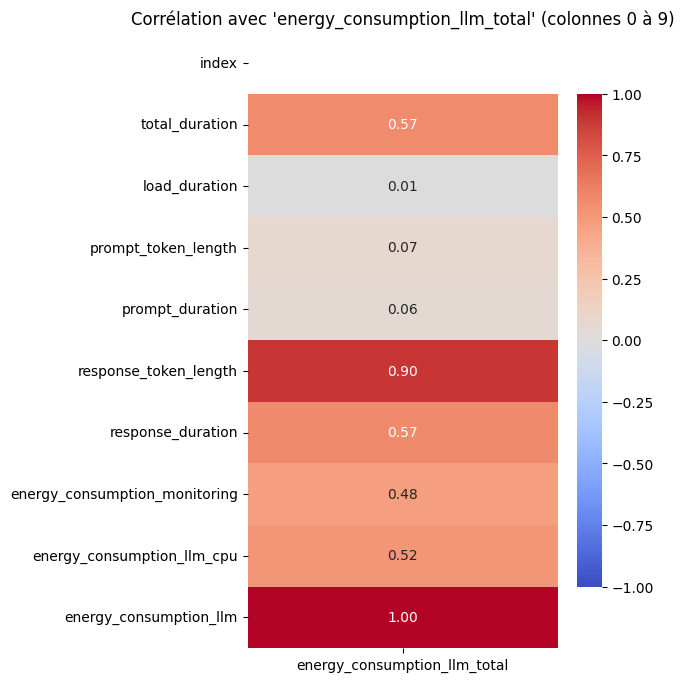

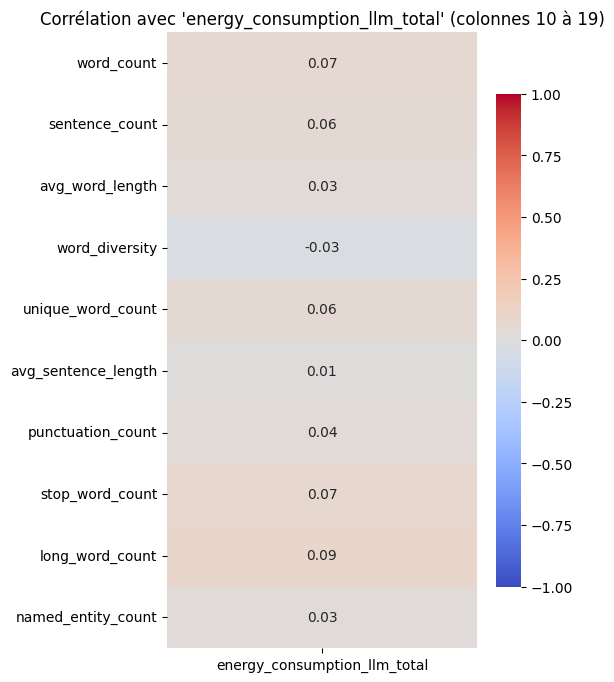

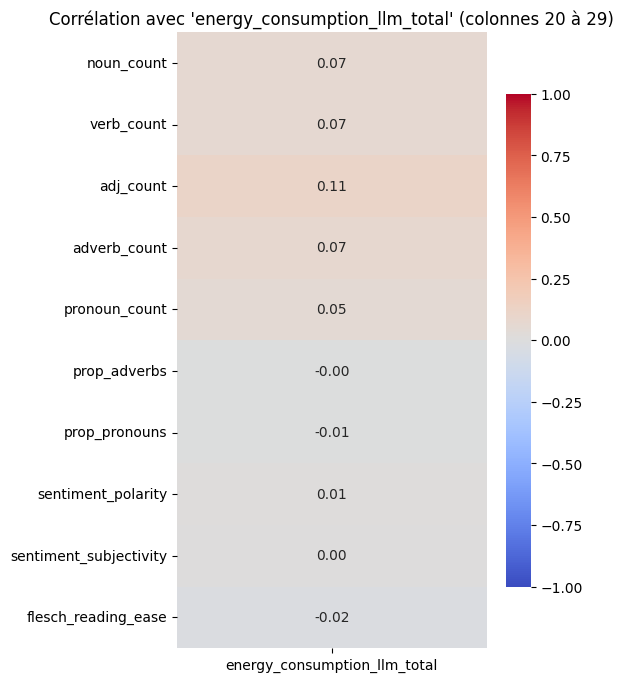

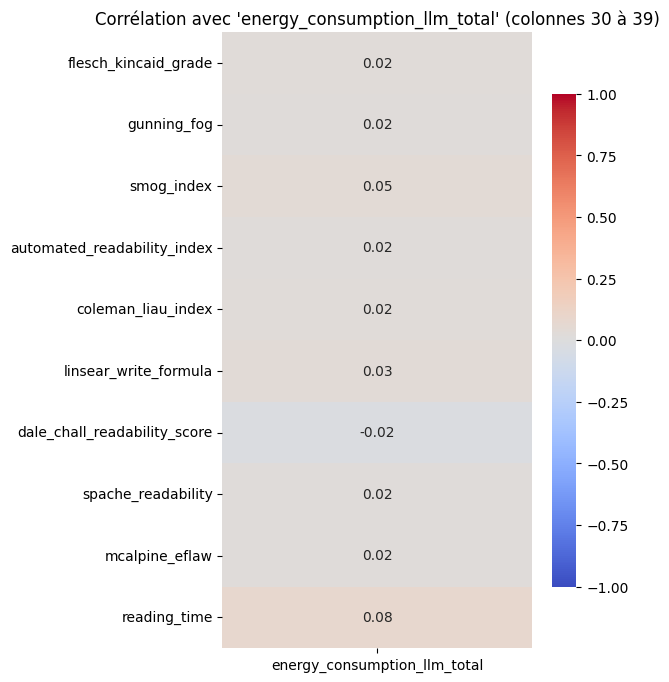

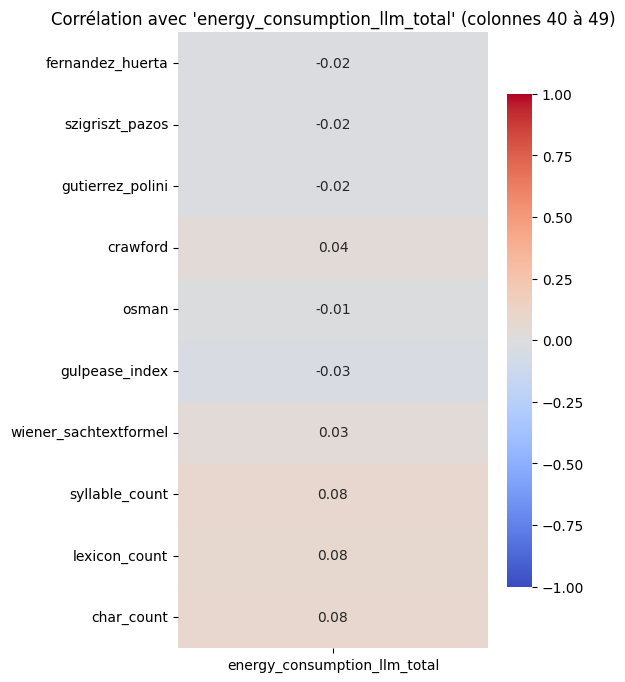

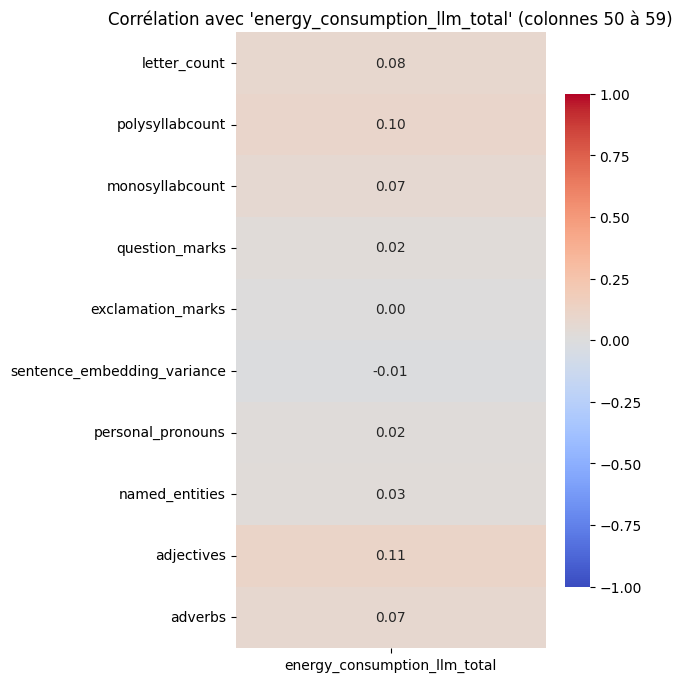

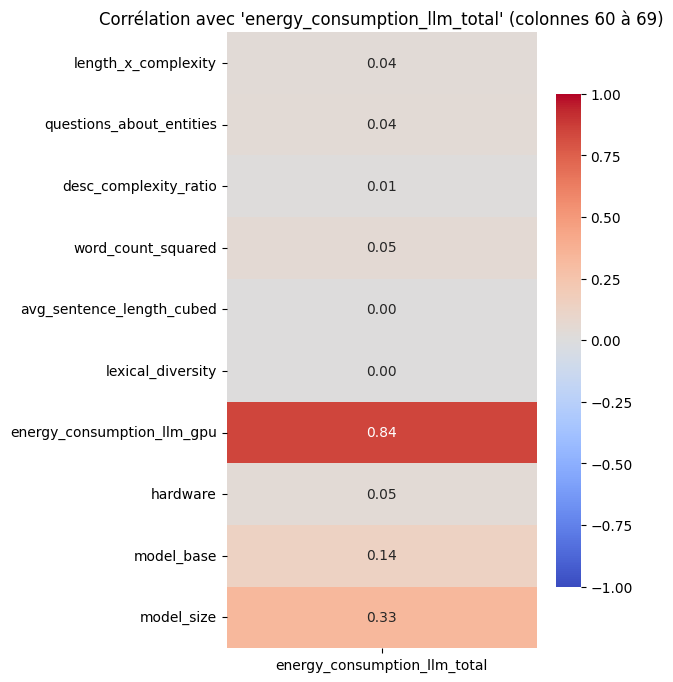

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# sélectionner colonnes numériques
numerical_cols = combined_data.select_dtypes(include=["float64", "int64"]).columns

# s'assurer que la colonne cible est présente
target = "energy_consumption_llm_total"
if target not in numerical_cols:
    raise ValueError("La colonne 'energy_consumption_llm_total' n'existe pas dans les données.")

# retirer le target de la liste pour ne pas le corréler avec lui-même
other_cols = [col for col in numerical_cols if col != target]

# Boucles par batch de 10 colonnes
for i in range(0, len(other_cols), 10):
    batch = other_cols[i:i+10]

    # calcul de la corrélation cible vs batch
    corr = combined_data[[target] + batch].corr()[[target]].iloc[1:]  # ignore la self-corr

    plt.figure(figsize=(5, 8))
    sns.heatmap(
        corr, annot=True, fmt=".2f", cmap="coolwarm",
        cbar_kws={"shrink": .8}, vmin=-1, vmax=1 
    )
    plt.title(f"Corrélation avec '{target}' (colonnes {i} à {i+len(batch)-1})")
    plt.show()


In [11]:
from xgboost import XGBRegressor
# X is combineddata with columns total_duration, prompt_token_length, response_token_length, response_duration, word_count, long_word_count, adj_count, reading_time, polysyllabcount, adjectives
X = combined_data[[
    "total_duration", 
    "prompt_token_length", 
    "response_token_length",
    "response_duration", 
    "word_count", 
    "reading_time",
    #"model_base",
    "model_size"
]].values
y = combined_data["energy_consumption_llm_total"].values
y = y*1000

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelXGBR = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    random_state=42
)

modelXGBR.fit(X_train, y_train)
y_pred = modelXGBR.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")
bests = {"first":{"name": "XGBRegressor", "model": modelXGBR, "mse": mse, "r2": r2},
         "second": {"name": "None", "model": modelXGBR, "mse": 0, "r2": 0},
         "third": {"name": "None", "model": modelXGBR, "mse": 0, "r2": 0}}

 Mean Squared Error: 0.07737082724520554
 R^2 Score: 0.6302547880856137


In [12]:
# X is combineddata with columns total_duration, prompt_token_length, response_token_length, response_duration, word_count, long_word_count, adj_count, reading_time, polysyllabcount, adjectives


X = combined_data[[
    "total_duration", 
    "prompt_token_length", 
    "response_token_length",
    "response_duration", 
    "word_count", 
    "reading_time",
    #"model_base",
    "model_size"
]].values
y = combined_data["energy_consumption_llm_total"].values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y*1000

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelXGBR = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    random_state=42
)

modelXGBR.fit(X_train, y_train)
y_pred = modelXGBR.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")
# check if the r2 is first, second or third best
if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "XGBRegressorScaled", "model": modelXGBR, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "XGBRegressorScaled", "model": modelXGBR, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "XGBRegressorScaled", "model": modelXGBR, "mse": mse, "r2": r2}

 Mean Squared Error: 0.07737082724520554
 R^2 Score: 0.6302547880856137


In [13]:
# regression lineaire avec sklearn
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_pred = modelLR.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")
if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "LinearRegression", "model": modelLR, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "LinearRegression", "model": modelLR, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "LinearRegression", "model": modelLR, "mse": mse, "r2": r2}

 Mean Squared Error: 0.04798491143111611
 R^2 Score: 0.7706862925277755


In [14]:
# regression polynomiale avec sklearn
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
modelPR2 = LinearRegression()
modelPR2.fit(X_train, y_train)
y_pred = modelPR2.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "PolynomialRegression2", "model": modelPR2, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "PolynomialRegression2", "model": modelPR2, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "PolynomialRegression2", "model": modelPR2, "mse": mse, "r2": r2}

 Mean Squared Error: 0.01716867175463436
 R^2 Score: 0.9179531303693126


In [15]:
# regression polynomiale avec sklearn
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
modelPR3 = LinearRegression()
modelPR3.fit(X_train, y_train)
y_pred = modelPR3.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")
if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "PolynomialRegression3", "model": modelPR3, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "PolynomialRegression3", "model": modelPR3, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "PolynomialRegression3", "model": modelPR3, "mse": mse, "r2": r2}

 Mean Squared Error: 13.795321764487698
 R^2 Score: -64.92606478243034


In [ ]:
X = combined_data[[
    "total_duration", 
    "prompt_token_length", 
    "response_token_length",
    "response_duration", 
    "word_count", 
    "reading_time",
    "model_size"
]].values
y = combined_data["energy_consumption_llm_total"].values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y*1000

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# ridge regression with sklearn
from sklearn.linear_model import Ridge
modelRidge = Ridge(alpha=1.0)
modelRidge.fit(X_train, y_train)
y_pred = modelRidge.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "RidgeRegression", "model": modelRidge, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "RidgeRegression", "model": modelRidge, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "RidgeRegression", "model": modelRidge, "mse": mse, "r2": r2}

 Mean Squared Error: 0.04798467159312933
 R^2 Score: 0.7706874386826043


In [18]:
# lasso regression with sklearn
from sklearn.linear_model import Lasso
modelLasso = Lasso(alpha=0.1)
modelLasso.fit(X_train, y_train)
y_pred = modelLasso.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "LassoRegression", "model": modelLasso, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "LassoRegression", "model": modelLasso, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "LassoRegression", "model": modelLasso, "mse": mse, "r2": r2}

 Mean Squared Error: 0.06255105236855427
 R^2 Score: 0.7010765822603746


In [19]:
# elastic net regression with sklearn
from sklearn.linear_model import ElasticNet
modelElasticNet = ElasticNet(alpha=0.1, l1_ratio=0.5)
modelElasticNet.fit(X_train, y_train)
y_pred = modelElasticNet.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "ElasticNetRegression", "model": modelElasticNet, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "ElasticNetRegression", "model": modelElasticNet, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "ElasticNetRegression", "model": modelElasticNet, "mse": mse, "r2": r2}

 Mean Squared Error: 0.053339004051138145
 R^2 Score: 0.7450997739278731


In [20]:
# knn regression with sklearn
from sklearn.neighbors import KNeighborsRegressor
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelKNN.fit(X_train, y_train)
y_pred = modelKNN.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "KNNRegression", "model": modelKNN, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "KNNRegression", "model": modelKNN, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "KNNRegression", "model": modelKNN, "mse": mse, "r2": r2}

 Mean Squared Error: 0.013147429415787613
 R^2 Score: 0.9371701292521587


In [21]:
# decision tree regression with sklearn
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor(random_state=42)
modelDTR.fit(X_train, y_train)
y_pred = modelDTR.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "DecisionTreeRegression", "model": modelDTR, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "DecisionTreeRegression", "model": modelDTR, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "DecisionTreeRegression", "model": modelDTR, "mse": mse, "r2": r2}

 Mean Squared Error: 0.004599804819926985
 R^2 Score: 0.9780181255847422


In [22]:
# random forest regression with sklearn
from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor(n_estimators=100, random_state=42)
modelRFR.fit(X_train, y_train)
y_pred = modelRFR.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "RandomForestRegression", "model": modelRFR, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "RandomForestRegression", "model": modelRFR, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "RandomForestRegression", "model": modelRFR, "mse": mse, "r2": r2}

 Mean Squared Error: 0.00482098980758695
 R^2 Score: 0.9769611110348598


In [23]:
# gradient boosting regression with sklearn
from sklearn.ensemble import GradientBoostingRegressor
modelGBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                     max_depth=3, random_state=42)
modelGBR.fit(X_train, y_train)
y_pred = modelGBR.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "GradientBoostingRegression", "model": modelGBR, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "GradientBoostingRegression", "model": modelGBR, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "GradientBoostingRegression", "model": modelGBR, "mse": mse, "r2": r2}

 Mean Squared Error: 0.004828513380734495
 R^2 Score: 0.9769251568484199


In [24]:
# LightGBM
from lightgbm import LGBMRegressor
modelLGBM = LGBMRegressor()
modelLGBM.fit(X_train, y_train)
y_pred = modelLGBM.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "LGBMRegressor", "model": modelLGBM, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "LGBMRegressor", "model": modelLGBM, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "LGBMRegressor", "model": modelLGBM, "mse": mse, "r2": r2}

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1535
[LightGBM] [Info] Number of data points in the train set: 56940, number of used features: 7
[LightGBM] [Info] Start training from score 0.146129
 Mean Squared Error: 0.1314531654295807
 R^2 Score: 0.371802263991057


c:\Users\Utilisateur\anaconda3\envs\mediapipe_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [25]:
# catboost
from catboost import CatBoostRegressor
modelCatBoost = CatBoostRegressor(verbose=0)
modelCatBoost.fit(X_train, y_train)
y_pred = modelCatBoost.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "CatBoostRegressor", "model": modelCatBoost, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "CatBoostRegressor", "model": modelCatBoost, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "CatBoostRegressor", "model": modelCatBoost, "mse": mse, "r2": r2}

 Mean Squared Error: 0.057942455242902674
 R^2 Score: 0.723100473971545


In [26]:
# svr 
from sklearn.svm import SVR
modelSVR = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
modelSVR.fit(X_train, y_train)
y_pred = modelSVR.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "SVR", "model": modelSVR, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "SVR", "model": modelSVR, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "SVR", "model": modelSVR, "mse": mse, "r2": r2}

 Mean Squared Error: 0.037685584012950066
 R^2 Score: 0.8199054508900953


In [27]:
# MLP regressor with sklearn
from sklearn.neural_network import MLPRegressor
modelMLP = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
modelMLP.fit(X_train, y_train)
y_pred = modelMLP.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "MLPRegressor", "model": modelMLP, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "MLPRegressor", "model": modelMLP, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "MLPRegressor", "model": modelMLP, "mse": mse, "r2": r2}

 Mean Squared Error: 0.00512350164587198
 R^2 Score: 0.9755154459471799


In [28]:
modelMLP = MLPRegressor(hidden_layer_sizes=(100, 50, 20), max_iter=1000, random_state=42)
modelMLP.fit(X_train, y_train)
y_pred = modelMLP.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "MLPRegressorDeep", "model": modelMLP, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "MLPRegressorDeep", "model": modelMLP, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "MLPRegressorDeep", "model": modelMLP, "mse": mse, "r2": r2}

 Mean Squared Error: 0.0013449670267516034
 R^2 Score: 0.9935725759174309


In [29]:
modelMLP = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=10000, random_state=42)
modelMLP.fit(X_train, y_train)
y_pred = modelMLP.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "MLPRegressorLongTrain", "model": modelMLP, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "MLPRegressorLongTrain", "model": modelMLP, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "MLPRegressorLongTrain", "model": modelMLP, "mse": mse, "r2": r2}

 Mean Squared Error: 0.00512350164587198
 R^2 Score: 0.9755154459471799


In [30]:
modelMLP = MLPRegressor(hidden_layer_sizes=(100, 50, 20), max_iter=10000, random_state=42)
modelMLP.fit(X_train, y_train)
y_pred = modelMLP.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R^2 Score: {r2}")

if r2 > bests["third"]["r2"]:
    if r2 > bests["second"]["r2"]:
        if r2 > bests["first"]["r2"]:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = bests["first"]
            bests["first"] = {"name": "MLPRegressorDeepLongTrain", "model": modelMLP, "mse": mse, "r2": r2}
        else:
            # shift down
            bests["third"] = bests["second"]
            bests["second"] = {"name": "MLPRegressorDeepLongTrain", "model": modelMLP, "mse": mse, "r2": r2}
    else:
        bests["third"] = {"name": "MLPRegressorDeepLongTrain", "model": modelMLP, "mse": mse, "r2": r2}

 Mean Squared Error: 0.0013449670267516034
 R^2 Score: 0.9935725759174309


In [31]:
bests

{'first': {'name': 'MLPRegressorDeep',
  'model': MLPRegressor(hidden_layer_sizes=(100, 50, 20), max_iter=1000, random_state=42),
  'mse': 0.0013449670267516034,
  'r2': 0.9935725759174309},
 'second': {'name': 'MLPRegressorDeepLongTrain',
  'model': MLPRegressor(hidden_layer_sizes=(100, 50, 20), max_iter=10000, random_state=42),
  'mse': 0.0013449670267516034,
  'r2': 0.9935725759174309},
 'third': {'name': 'DecisionTreeRegression',
  'model': DecisionTreeRegressor(random_state=42),
  'mse': 0.004599804819926985,
  'r2': 0.9780181255847422}}

In [45]:
# download best model
import joblib
joblib.dump(bests["first"]["model"], f"{bests['first']['name']}_model.pkl")
joblib.dump(bests["second"]["model"], f"{bests['second']['name']}_model.pkl")
joblib.dump(bests["third"]["model"], f"{bests['third']['name']}_model.pkl")

['DecisionTreeRegression_model.pkl']

In [33]:
# use the downloaded model to make predictions
loaded_model = joblib.load(f"{bests['first']['name']}_model.pkl")
y_pred_loaded = loaded_model.predict(X_test)
print(y_pred_loaded)

[0.04771885 0.10135672 0.01980379 ... 0.20139331 0.07219766 0.48698859]


In [34]:
try:
    print(loaded_model.feature_names_in_)
except:
    print("Impossible de récupérer les noms des features automatiquement.")


Impossible de récupérer les noms des features automatiquement.


In [35]:
print(loaded_model.n_features_in_)


7


In [36]:
# convert y_pred_loaded back to original scale - back to kWh
y_pred_loaded = y_pred_loaded / 1000

# convert kWh to Co2 emissions
co2_per_kwh = 0.056  # average value, can vary by region
co2_emissions = y_pred_loaded * co2_per_kwh
print(co2_emissions)

[2.67225559e-06 5.67597628e-06 1.10901241e-06 ... 1.12780254e-05
 4.04306869e-06 2.72713609e-05]


In [37]:
# carbon footprint of the company
total_co2_footprint = co2_emissions.sum()
print(f"Total carbon footprint of the company: {total_co2_footprint} g CO2")

Total carbon footprint of the company: 0.20921689005510966 g CO2


In [ ]:
# plot feature importance for the best model if it has feature_importances_ attribute
if hasattr(bests["first"]["model"], "feature_importances_"):
    importances = bests["first"]["model"].feature_importances_
    feature_names = [
        "total_duration", 
        "prompt_token_length", 
        "response_token_length",
        "response_duration", 
        "word_count", 
        "reading_time",
        "model_size"
    ]
    fig = plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Fond transparent
    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)
    plt.barh(feature_names, importances, color="#2d4af3")
    plt.xlabel("Importance", color="white")
    plt.title(f"Feature Importance for {bests['first']['name']}", color="white")

    # Color des labels de l'axe Y
    plt.yticks(color="white")
    # Color des ticks de l'axe X
    plt.xticks(color="white")
    plt.show()


In [ ]:
# plot feature importance for the best model if it has feature_importances_ attribute
if hasattr(bests["second"]["model"], "feature_importances_"):
    importances = bests["second"]["model"].feature_importances_
    feature_names = [
        "total_duration", 
        "prompt_token_length", 
        "response_token_length",
        "response_duration", 
        "word_count", 
        "reading_time",
        "model_size"
    ]
    fig = plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Fond transparent
    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)
    plt.barh(feature_names, importances, color="#2d4af3")
    plt.xlabel("Importance", color="white")
    plt.title(f"Feature Importance for {bests['second']['name']}", color="white")

    # Color des labels de l'axe Y
    plt.yticks(color="white")
    # Color des ticks de l'axe X
    plt.xticks(color="white")
    plt.show()

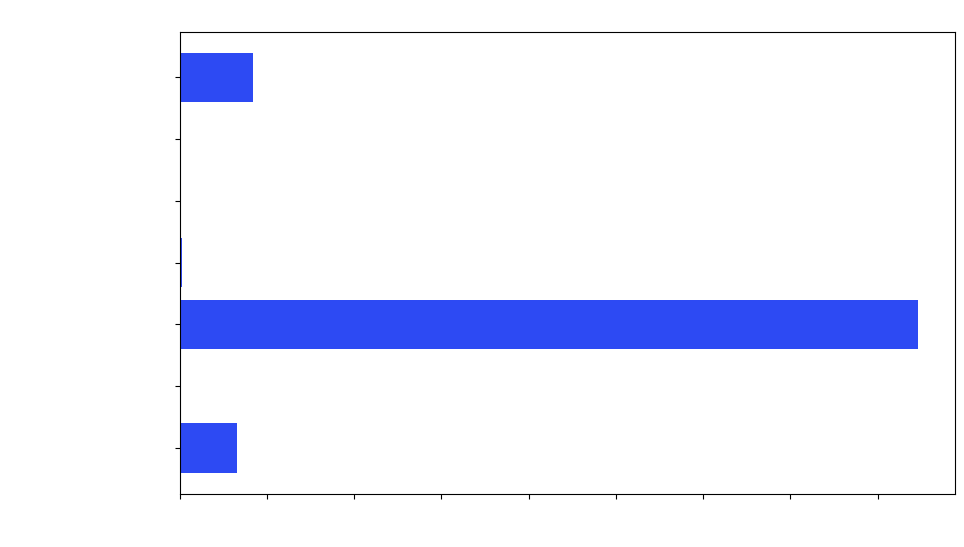

In [43]:
# plot feature importance for the best model if it has feature_importances_ attribute
if hasattr(bests["third"]["model"], "feature_importances_"):
    importances = bests["third"]["model"].feature_importances_
    feature_names = [
        "total_duration", 
        "prompt_token_length", 
        "response_token_length",
        "response_duration", 
        "word_count", 
        "reading_time",
        "model_size"
    ]
    fig = plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Fond transparent
    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)
    plt.barh(feature_names, importances, color="#2d4af3")
    plt.xlabel("Importance", color="white")
    plt.title(f"Feature Importance for {bests['third']['name']}", color="white")

    # Color des labels de l'axe Y
    plt.yticks(color="white")
    # Color des ticks de l'axe X
    plt.xticks(color="white")
    plt.show()